In [1]:
!pip install seaborn scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.datasets import cifar10

In [3]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Class labels for CIFAR-10
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print(f"Training samples: {X_train.shape}")
print(f"Testing samples: {X_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training samples: (50000, 32, 32, 3)
Testing samples: (10000, 32, 32, 3)


In [4]:
# Normalize images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the 32x32x3 images into 3072 vectors
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

print(f"Flattened input shape: {X_train_flat.shape}")

Flattened input shape: (50000, 3072)


In [5]:
# Reduce dimensionality from 3072 to 100 using PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

print(f"PCA-reduced shape: {X_train_pca.shape}")

PCA-reduced shape: (50000, 100)


In [6]:
# Create validation set (20% of training)
X_train_final, X_val, y_train_final, y_val = train_test_split(
X_train_pca, y_train, test_size=0.2, random_state=42)

print(f"Training set size: {X_train_final.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 40000
Validation set size: 10000


In [7]:
# Train Support Vector Machine
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train_final, y_train_final)

print(" SVM training completed.")

 SVM training completed.


In [8]:
# Predictions
val_preds = svm_model.predict(X_val)
test_preds = svm_model.predict(X_test_pca)

# Accuracy Scores
val_acc = accuracy_score(y_val, val_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Validation Accuracy: 0.5500
Test Accuracy: 0.5468


In [9]:
# Classification Report for Test Set
report = classification_report(y_test, test_preds, target_names=class_labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

    Airplane       0.60      0.64      0.62      1000
  Automobile       0.63      0.67      0.65      1000
        Bird       0.43      0.44      0.43      1000
         Cat       0.36      0.41      0.38      1000
        Deer       0.49      0.48      0.48      1000
         Dog       0.48      0.46      0.47      1000
        Frog       0.60      0.60      0.60      1000
       Horse       0.64      0.55      0.59      1000
        Ship       0.67      0.65      0.66      1000
       Truck       0.61      0.58      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



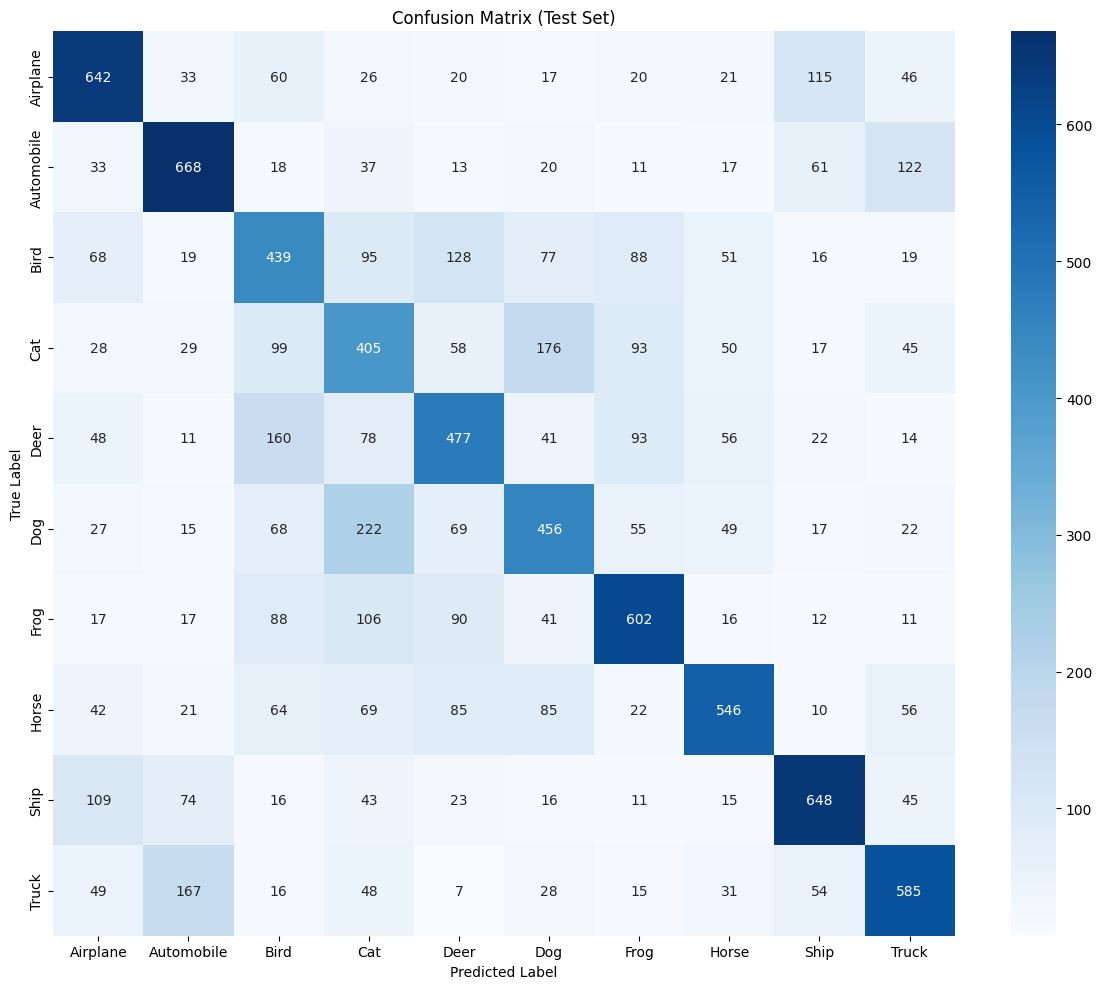

In [10]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()